Chaotic systems with a continuous notion of time can be computationally expensive to model.  However, problems with discrete time steps are much easier to explore on the computer.  We'll look at one example of such a system in this notebook--the one-dimensional logistic map.

The logistic map is a discrete iterative map, which means that it maps a current value, $x_n$, onto the next value, $x_{n+1}$, following some rule:

$$x_{n+1} = f(x_n)$$.

For a given intial value $x_1$, this mapping can either lead to stable fixed points ($x^* = x_{n+1} = x_n$), cycles ($x_{n+i}=x_n \ | \ \forall n, i \in \mathbb{Z}>1$), or seemingly random values of $x_n$.  This seemingly random behavior is called "chaos".  As we will see, this chaotic behavior is not truly random but displays structure related to the defining function $f(x)$.

The iterative equation of the one-dimensional logistic map is

$$x_{n+1} = rx_n(1-x_n)$$,

where $0 < r< 4$ is a "gain" parameter.  Use the following functions to explore the bifurcation diagram of the logistic map.

In [67]:
import numpy as np
import matplotlib.pyplot as plt

#Defining function of logistic map
def f(x, r):
    return r*x*(1-x)

def iterate(r, num_steps, burn):
    x = 0.5
    points = []
    for i in range(num_steps):
        x = f(x,r)
        if i > burn:
            points.append((r,x))
    return(points)
            
def bifurcation_diagram(low, high, ylim):
    points = []
    r_list = np.linspace(low, high,1000)
    for r in r_list:
        points.extend(iterate(r,1000,500))   #you may want to scale these up for higher precision
    fig, ax1 = plt.subplots(1, 1, figsize=(8, 8))
    r, x = zip(*points)
    ax1.plot(r, x, ',c', alpha=.1)
    ax1.set_xlim(low, high)
    ax1.set_ylim(ylim[0], ylim[1])
    ax1.set_title("Bifurcation diagram", fontsize = 20)
    ax1.set_xlabel('r', fontsize=16)
    ax1.set_ylabel('x', fontsize=16)
    ax1.tick_params(axis='both', which='major', labelsize=14)
    plt.show()
    

Please explain in a sentence or two what the code above is doing to generate a bifurcation diagram.  It may help to first run the code for $x\in(0,4)$ and $y\in(0,1)$ to see the results.

Consider figure 12.41 in Taylor.  The small rectangular box in it is enlarged and shown in figure 12.44.  Recreate both of these plots using the function above.

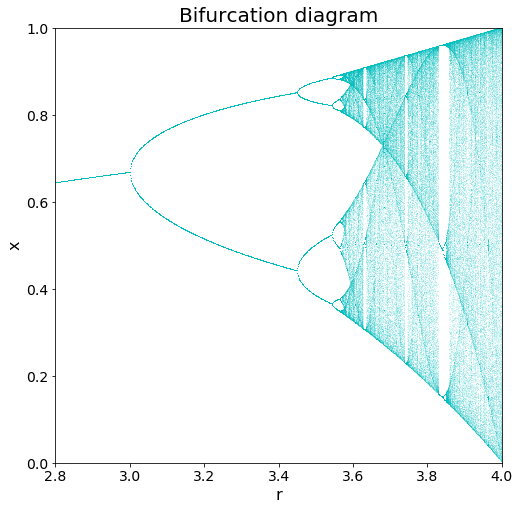

In [60]:
A:  bifurcation_diagram(2.8, 4.0, [0.0, 1.0])

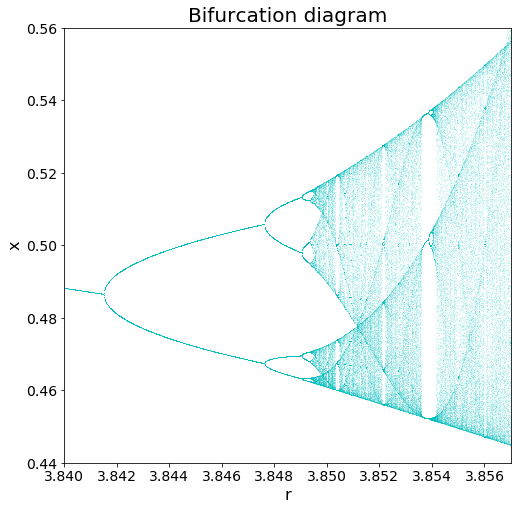

In [66]:
A:  bifurcation_diagram(3.84, 3.857, [0.44, 0.56])

Compare your enlarged version to the original.  Consider (and plot) a third iteration with the following bounds:
$r \in (3.8537, 3.8542)$ and $x \in (0.491, 0.5073)$. What do you observe?

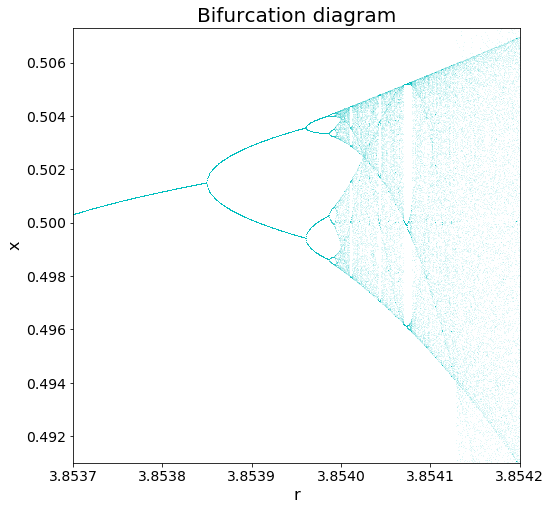

In [65]:
A:  bifurcation_diagram(3.8537, 3.8542, [0.491, 0.5073])

A:  We observe the same figure: first upright, then inverted, then upright again, but it is present at 3 drastically different scales.

To quantify the phenomenon we're observing here, we turn to Feigenbaum's $\delta$ (discussed on page 474 of Taylor).  Play around with your figure to identify roughly for what $r$ values the first 4 period-doubling bifurcation occurs.  Note them  below approximately (To observe convergence, you will probably need to go to 4 decimals for the last two and boost the number of iterations of the code before it  designates an $x$ value as a fixed point):

A:

First PDB: r=3 

Second PDB: r=3.448 

Third PDB: r=3.5435

Fourth PDB: r=3.56395


Once we have at least 4 consecutive values of $r$ where a period doubling bifurcation occurs, apply equation 12.17 from Taylor to approximate $\delta$.  Do you observe convergence?

A:  $(r_3-r_2)=\frac{1}{\delta}(r_2-r_1) \rightarrow \delta=4.666$

A:  $(r_4-r_3)=\frac{1}{\delta}(r_3-r_2) \rightarrow \delta=4.66992$

A:  Yes, we observe convergence to Feiganbaum's constant